# Bank Loan Approval Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Load Dataset

In [9]:
df = pd.read_csv(r"C:\Users\chait\Downloads\bank_loan_approval_data.csv")

## Explore Data

In [10]:
print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   Loan_ID  Gender Married Dependents     Education Self_Employed  \
0  LP00001    Male     Yes          0  Not Graduate           Yes   
1  LP00002  Female     Yes          0  Not Graduate            No   
2  LP00003    Male     Yes          2  Not Graduate            No   
3  LP00004    Male     Yes          1  Not Graduate            No   
4  LP00005    Male     Yes          1      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0            18281               3584         110               360   
1            17305               9588         683               180   
2            11817               8053         100               480   
3            13261               3330         452               180   
4             2417               2703          54               180   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural          

In [11]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            150 non-null    object 
 1   Gender             150 non-null    object 
 2   Married            150 non-null    object 
 3   Dependents         150 non-null    object 
 4   Education          150 non-null    object 
 5   Self_Employed      150 non-null    object 
 6   ApplicantIncome    150 non-null    int64  
 7   CoapplicantIncome  150 non-null    int64  
 8   LoanAmount         150 non-null    int64  
 9   Loan_Amount_Term   150 non-null    int64  
 10  Credit_History     150 non-null    float64
 11  Property_Area      150 non-null    object 
 12  Loan_Status        150 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 15.4+ KB
None


In [12]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [13]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       150.000000         150.000000  150.000000        150.000000   
mean      13357.833333        5171.780000  361.620000        313.200000   
std        6919.463610        2677.325674  206.901516        106.079114   
min        2412.000000           9.000000   50.000000        180.000000   
25%        7153.250000        3325.500000  167.000000        240.000000   
50%       13217.500000        5119.500000  356.500000        300.000000   
75%       19623.750000        7300.500000  559.250000        360.000000   
max       24925.000000        9911.000000  699.000000        480.000000   

       Credit_History  
count      150.000000  
mean         0.853333  
std          0.354958  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


###  Data Visualization

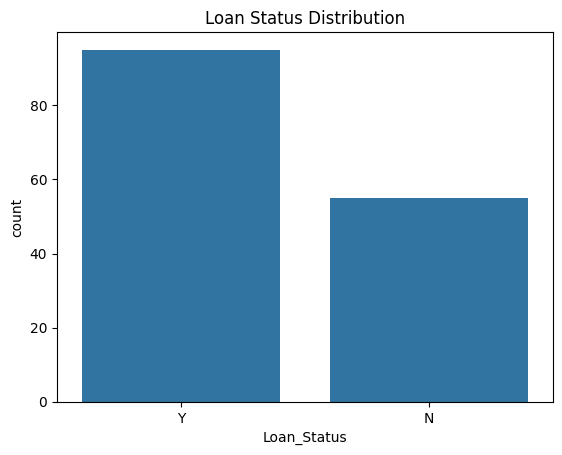

In [14]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status Distribution')
plt.show()

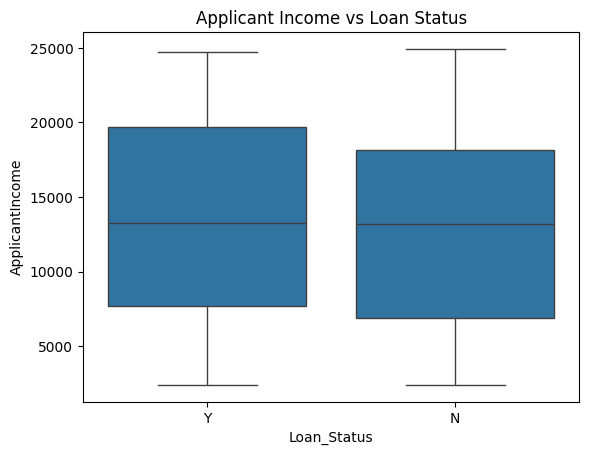

In [15]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income vs Loan Status')
plt.show()


In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'LP00001'

<Figure size 1000x600 with 0 Axes>

In [23]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP00001,Male,Yes,0,Not Graduate,Yes,18281,3584,110,360,1.0,Urban,Y
1,LP00002,Female,Yes,0,Not Graduate,No,17305,9588,683,180,1.0,Rural,N
2,LP00003,Male,Yes,2,Not Graduate,No,11817,8053,100,480,1.0,Semiurban,Y
3,LP00004,Male,Yes,1,Not Graduate,No,13261,3330,452,180,1.0,Urban,Y
4,LP00005,Male,Yes,1,Graduate,Yes,2417,2703,54,180,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,LP00146,Male,No,2,Not Graduate,No,8190,1887,699,240,1.0,Semiurban,Y
146,LP00147,Male,No,2,Graduate,Yes,19640,3266,221,240,1.0,Semiurban,Y
147,LP00148,Male,Yes,1,Graduate,Yes,21760,666,62,300,1.0,Semiurban,N
148,LP00149,Male,Yes,2,Not Graduate,Yes,7645,4188,217,240,1.0,Urban,N


In [25]:
df.shape

(150, 13)

In [26]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
145,LP00146,Male,No,2,Not Graduate,No,8190,1887,699,240,1.0,Semiurban,Y
146,LP00147,Male,No,2,Graduate,Yes,19640,3266,221,240,1.0,Semiurban,Y
147,LP00148,Male,Yes,1,Graduate,Yes,21760,666,62,300,1.0,Semiurban,N
148,LP00149,Male,Yes,2,Not Graduate,Yes,7645,4188,217,240,1.0,Urban,N
149,LP00150,Female,No,1,Not Graduate,No,21870,671,691,300,1.0,Urban,Y


In [27]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,13357.833333,5171.780000,361.620000,313.200000,0.853333
std,6919.463610,2677.325674,206.901516,106.079114,0.354958
min,2412.000000,9.000000,50.000000,180.000000,0.000000
25%,7153.250000,3325.500000,167.000000,240.000000,1.000000
50%,13217.500000,5119.500000,356.500000,300.000000,1.000000
75%,19623.750000,7300.500000,559.250000,360.000000,1.000000
max,24925.000000,9911.000000,699.000000,480.000000,1.000000


In [28]:
df.count()

Loan_ID              150
Gender               150
Married              150
Dependents           150
Education            150
Self_Employed        150
ApplicantIncome      150
CoapplicantIncome    150
LoanAmount           150
Loan_Amount_Term     150
Credit_History       150
Property_Area        150
Loan_Status          150
dtype: int64

In [29]:
df.min()

Loan_ID               LP00001
Gender                 Female
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          2412
CoapplicantIncome           9
LoanAmount                 50
Loan_Amount_Term          180
Credit_History            0.0
Property_Area           Rural
Loan_Status                 N
dtype: object

NameError: name 'Loan_ID' is not defined